<a href="https://colab.research.google.com/github/tavares51/Introducao_IA/blob/main/Tarefa2_Introducao_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Dataset

The columns are as following:
<br>
[kagle](https://www.kaggle.com/datasets/thedevastator/airbnb-price-determinants-in-europe)
<br>
[source](https://zenodo.org/record/4446043#.Y9Y7ZtJBwUE)
<br>
**realSum**: the full price of accommodation for two people and two nights in EUR <br>
**room_type**: the type of the accommodation
<br>
**room_shared**: dummy variable for shared rooms
<br>
**room_private**: dummy variable for private rooms
<br>
**person_capacity**: the maximum number of guests
<br>
**host_is_superhost**: dummy variable for superhost status
<br>
**multi**: dummy variable if the listing belongs to hosts with 2-4 offers
<br>
**biz**: dummy variable if the listing belongs to hosts with more than 4 offers
<br>
**cleanliness_rating**: cleanliness rating
<br>
**guest_satisfaction_overall**: overall rating of the listing
<br>
**bedrooms**: number of bedrooms (0 for studios)
<br>
**dist**: distance from city centre in km
<br>
**metro_dist**: distance from nearest metro station in km
<br>
**attr_index**: attraction index of the listing location
<br>
**attr_index_norm**: normalised attraction index (0-100)
<br>
**rest_index**: restaurant index of the listing location
<br>
**attr_index_norm**: normalised restaurant index (0-100)
<br>
**lng**: longitude of the listing location
<br>
**lat**: latitude of the listing location
<br>

In [ ]:
lisbon_weekends = pd.read_csv('https://raw.githubusercontent.com/tavares51/dadosIA/main/lisbon_weekends.csv')
lisbon_weekdays = pd.read_csv('https://raw.githubusercontent.com/tavares51/dadosIA/main/lisbon_weekdays.csv')

In [ ]:
lisbon = pd.concat([lisbon_weekends, lisbon_weekdays])

In [ ]:
lisbon.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,137.664165,Private room,False,True,2.0,True,1,0,10.0,98.0,1,4.328041,0.298493,74.230019,2.448349,176.867933,9.940446,-9.14034,38.75137
1,1,123.827392,Private room,False,True,2.0,True,1,0,10.0,97.0,1,4.465486,0.293602,72.571059,2.393631,173.909831,9.774192,-9.14092,38.75260
2,2,193.011257,Private room,False,True,4.0,True,1,0,10.0,87.0,2,4.475239,0.167851,72.517817,2.391875,177.996433,10.003870,-9.14245,38.75264
3,3,326.219512,Entire home/apt,False,False,6.0,False,1,0,9.0,93.0,2,0.667018,0.530362,537.049195,17.713637,775.734765,43.598345,-9.13200,38.71300
4,4,174.484053,Private room,False,True,3.0,False,0,1,10.0,96.0,1,4.888606,0.466018,67.971330,2.241917,160.215069,9.004511,-9.14053,38.75642


In [ ]:
lisbon.shape

(5763, 20)

In [ ]:
lisbon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5763 entries, 0 to 2856
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5763 non-null   int64  
 1   realSum                     5763 non-null   float64
 2   room_type                   5763 non-null   object 
 3   room_shared                 5763 non-null   bool   
 4   room_private                5763 non-null   bool   
 5   person_capacity             5763 non-null   float64
 6   host_is_superhost           5763 non-null   bool   
 7   multi                       5763 non-null   int64  
 8   biz                         5763 non-null   int64  
 9   cleanliness_rating          5763 non-null   float64
 10  guest_satisfaction_overall  5763 non-null   float64
 11  bedrooms                    5763 non-null   int64  
 12  dist                        5763 non-null   float64
 13  metro_dist                  5763 

In [ ]:
lisbon.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5763.0,1440.354156,832.069921,0.000000,720.000000,1440.000000,2160.500000,2905.000000
realSum,5763.0,238.210479,108.973079,70.590994,160.178236,225.375235,286.350844,1681.050657
person_capacity,5763.0,3.343398,1.344214,2.000000,2.000000,3.000000,4.000000,6.000000
multi,5763.0,0.239459,0.426790,0.000000,0.000000,0.000000,0.000000,1.000000
biz,5763.0,0.587541,0.492320,0.000000,0.000000,1.000000,1.000000,1.000000
cleanliness_rating,5763.0,9.370640,0.924080,2.000000,9.000000,10.000000,10.000000,10.000000
guest_satisfaction_overall,5763.0,91.093875,9.148114,20.000000,88.000000,93.000000,97.000000,100.000000
bedrooms,5763.0,1.272428,0.728539,0.000000,1.000000,1.000000,2.000000,10.000000
dist,5763.0,1.966893,1.742681,0.043315,0.812614,1.387698,2.443833,9.574470
metro_dist,5763.0,0.711482,0.920204,0.006158,0.287987,0.447592,0.673630,6.164745


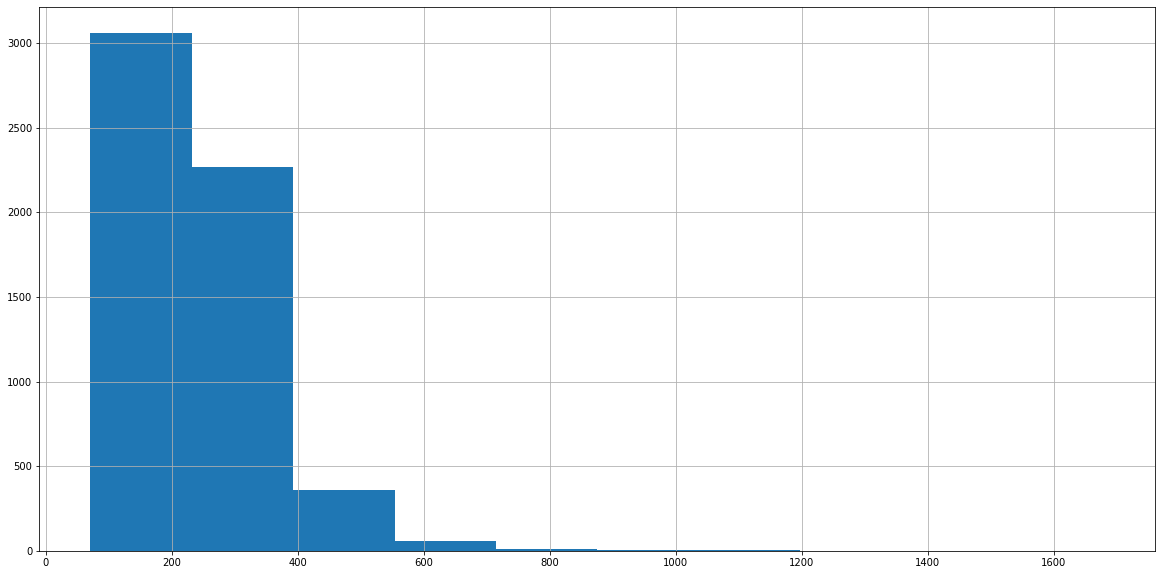

In [ ]:
plt.figure(figsize=(20, 10))
lisbon.realSum.hist()
plt.show()

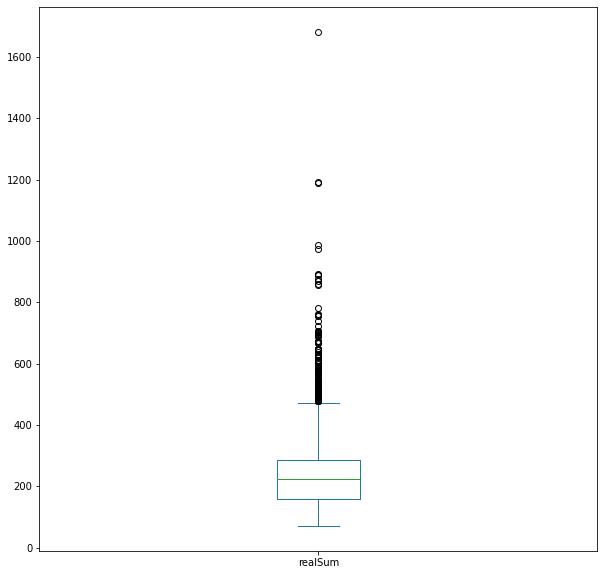

In [ ]:
plt.figure(figsize=(10, 10))
lisbon.realSum.plot.box()
plt.show()

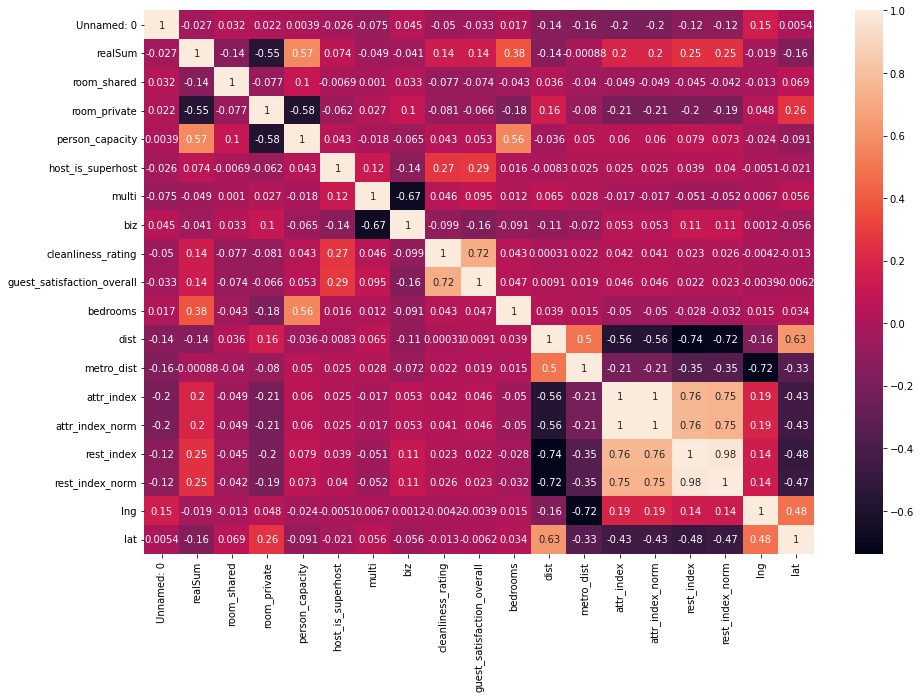

In [ ]:
corr = lisbon.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
lisbon["realSumLog"] = np.log((lisbon.realSum + 1))

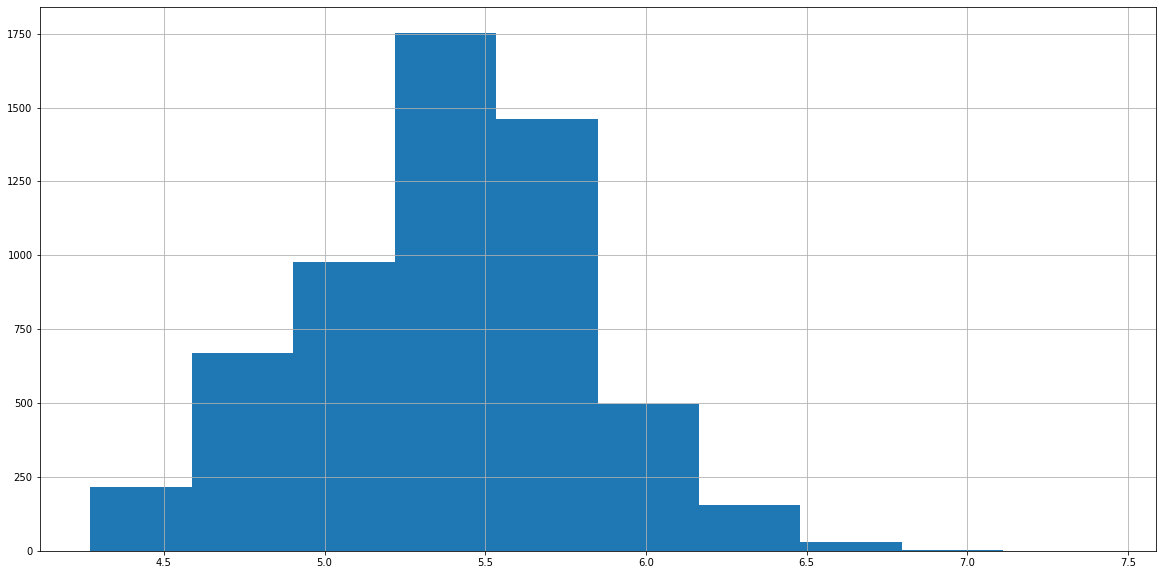

In [ ]:
plt.figure(figsize=(20, 10))
lisbon.realSumLog.hist()
plt.show()

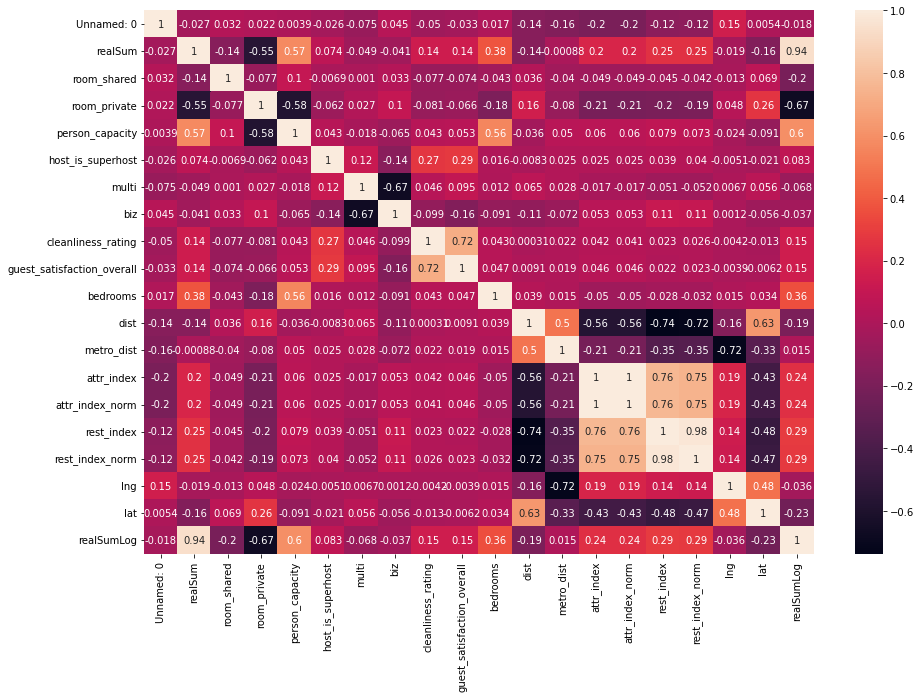

In [ ]:
corr = lisbon.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()

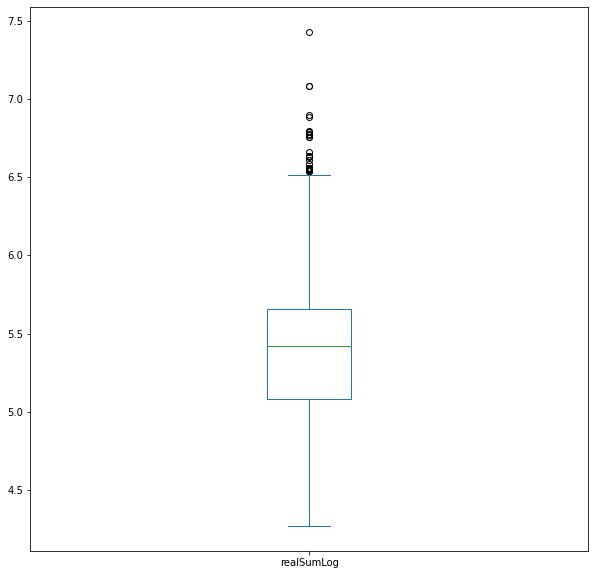

In [ ]:
plt.figure(figsize=(10, 10))
lisbon.realSumLog.plot.box()
plt.show()

In [ ]:
#lisbon1 = lisbon[lisbon["realSumLog"] < 6.5]
lisbon1 = lisbon

In [ ]:
lisbon.shape

(5763, 21)

In [ ]:
lisbon1.shape

(5727, 21)

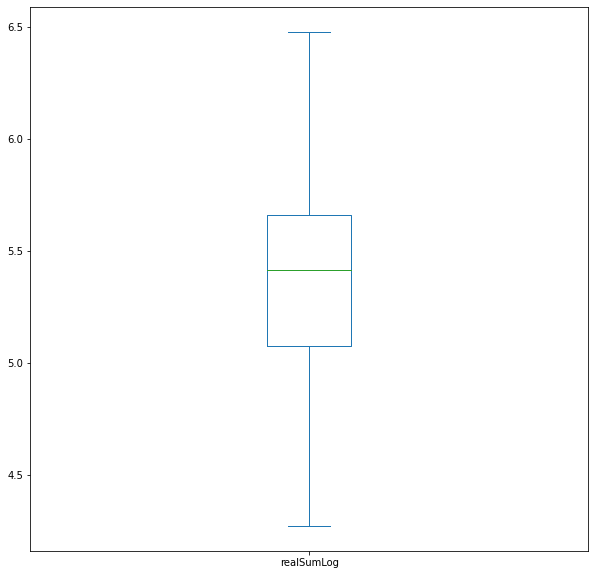

In [ ]:
plt.figure(figsize=(10, 10))
lisbon1.realSumLog.plot.box()
plt.show()

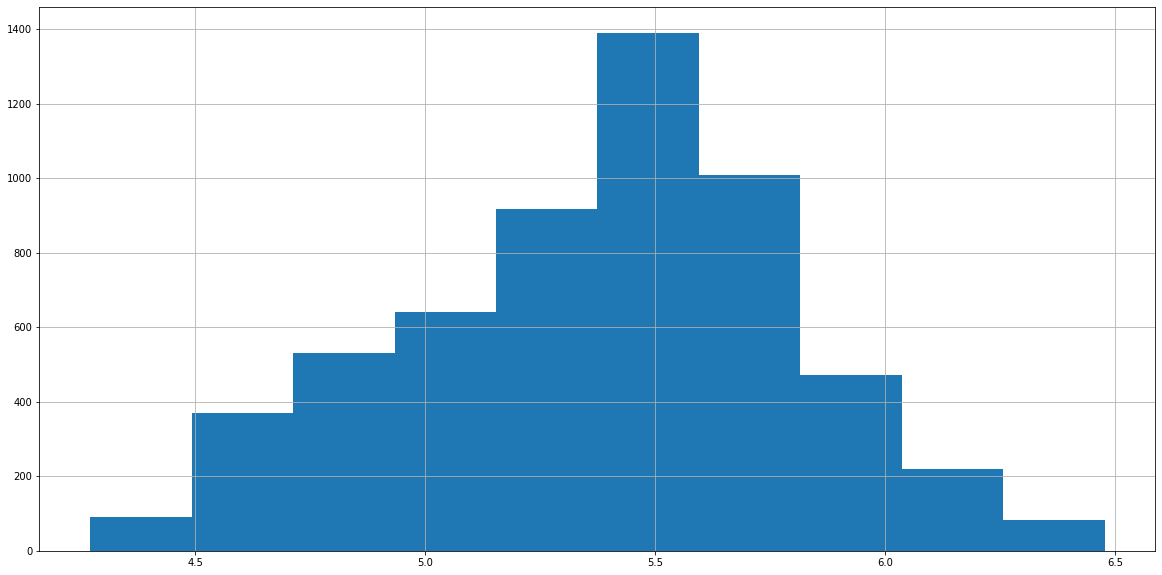

In [ ]:
plt.figure(figsize=(20, 10))
lisbon1.realSumLog.hist()
plt.show()

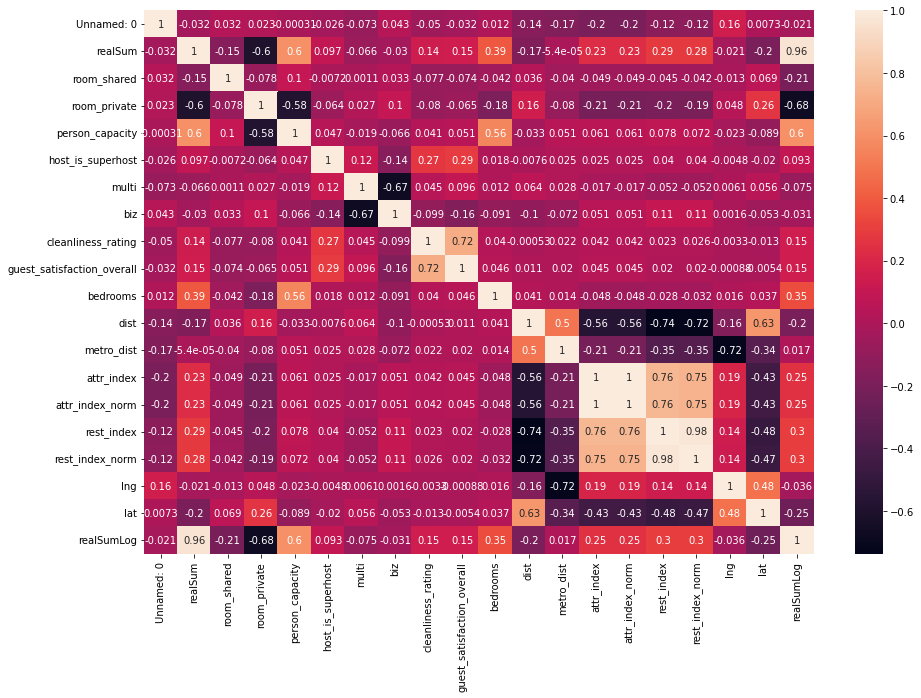

In [ ]:
corr = lisbon1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
corr.realSumLog.sort_values()[::-1]

realSumLog                    1.000000
realSum                       0.963210
person_capacity               0.599981
bedrooms                      0.350110
rest_index                    0.300325
rest_index_norm               0.297190
attr_index                    0.253242
attr_index_norm               0.253234
guest_satisfaction_overall    0.146449
cleanliness_rating            0.145569
host_is_superhost             0.093164
metro_dist                    0.016681
Unnamed: 0                   -0.021296
biz                          -0.031257
lng                          -0.035796
multi                        -0.074760
dist                         -0.200855
room_shared                  -0.208258
lat                          -0.246835
room_private                 -0.676620
Name: realSumLog, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
SEED = 42
np.random.seed(SEED)

In [ ]:
features = ['person_capacity', 'bedrooms', 'attr_index_norm', 'rest_index_norm', 'cleanliness_rating', 'room_shared', 'metro_dist', 'guest_satisfaction_overall', 'room_private', 'multi', 'biz']

In [ ]:
def plot_hist(df, col_name):
    plt.title(f'hist of {col_name}')
    sns.histplot(data=df, x=col_name)
    plt.show()

In [ ]:
X = lisbon1[features]
y = lisbon1.realSumLog

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=32)

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')

print('Cross-validation RMSE scores:', -scores)
mean_rmse = np.mean(-scores)
print('Mean RMSE score:', mean_rmse)

Cross-validation RMSE scores: [0.22185612 0.2336348  0.23441243 0.2348143  0.23350171]
Mean RMSE score: 0.23164387172763634


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train, eval_set = [(X_train, y_train), (X_val, y_val)])

[0]	validation_0-rmse:4.41029	validation_1-rmse:4.39611
[1]	validation_0-rmse:3.97139	validation_1-rmse:3.95857
[2]	validation_0-rmse:3.57652	validation_1-rmse:3.56493
[3]	validation_0-rmse:3.22129	validation_1-rmse:3.21088
[4]	validation_0-rmse:2.90178	validation_1-rmse:2.89254
[5]	validation_0-rmse:2.61443	validation_1-rmse:2.60635
[6]	validation_0-rmse:2.35605	validation_1-rmse:2.34878
[7]	validation_0-rmse:2.12375	validation_1-rmse:2.11749
[8]	validation_0-rmse:1.91497	validation_1-rmse:1.90947
[9]	validation_0-rmse:1.72732	validation_1-rmse:1.72261
[10]	validation_0-rmse:1.55876	validation_1-rmse:1.55487
[11]	validation_0-rmse:1.40731	validation_1-rmse:1.40437
[12]	validation_0-rmse:1.27147	validation_1-rmse:1.26933
[13]	validation_0-rmse:1.14956	validation_1-rmse:1.14795
[14]	validation_0-rmse:1.04035	validation_1-rmse:1.03919
[15]	validation_0-rmse:0.94251	validation_1-rmse:0.941745
[16]	validation_0-rmse:0.855011	validation_1-rmse:0.854868
[17]	validation_0-rmse:0.77689	validat

XGBRegressor(eval_metric='rmse', objective='reg:squarederror')

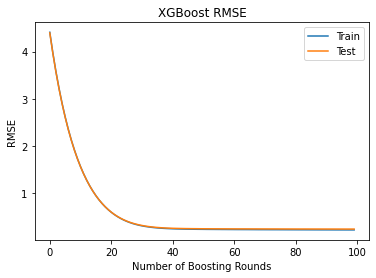

In [ ]:
results = model.evals_result()
train_error = results['validation_0']['rmse']
test_error = results['validation_1']['rmse']
epochs = len(train_error)
x_axis = range(0, epochs)
plt.plot(x_axis, train_error, label='Train')
plt.plot(x_axis, test_error, label='Test')
plt.legend()
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Root mean squared error:', np.sqrt(mse))
print('R2:', r2_score(y_test, y_pred))

Root mean squared error: 0.24058559679310546
R2: 0.7018712620536646


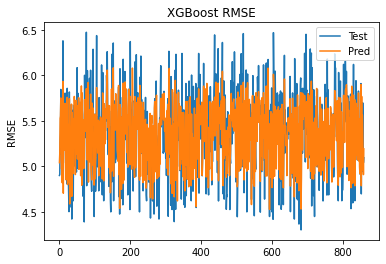

In [ ]:
plt.title('RMSE on test set with predict')
epochs = len(y_pred)
x_axis = range(0, epochs)
plt.plot(x_axis, y_test.to_numpy(), label='Test')
plt.plot(x_axis, y_pred, label='Pred')
plt.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()